### Introducción a Limpieza de Datos 

### Paso 1: Librerias de python

In [2]:
##Limpieza de datos , manipulación
import pandas as pd
##arreglos y matemáticos
import numpy as np
##Graficas estáticas
import matplotlib.pyplot as plt
import seaborn as sns

##Manejo de warnings
import warnings
warnings.simplefilter('ignore')

### Paso: Funciones 

In [3]:
##Función para carga de datos
def cargaDatos(ruta, nomarchivo, ext, sep):
    if ext == '.xlsx':
        datos = pd.read_excel(ruta+nomarchivo+ext)
        return datos
    elif ext== '.csv':
        datos = pd.read_csv(ruta+nomarchivo+ext, encoding="latin-1", sep=sep)
        return datos
    else:
        print('la cagastes no existe esa extensión')
##Función para revisar datos NAN
def datosNA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" % 
              (df.shape[0], df.shape[1]))
        print("Total de valores NAN: %d" %(total_na))
        print("%38s %10s   %10s %10s" % 
              ("Nombre de columna", "Tipo de dato", "# Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % 
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe estas loco!: %15s" % (type(df)))

##Función tres histograma para datos numéricos
def grafhisto(df, nomcol, anchobar):
    sns.histplot(df, x=nomcol, binwidth=anchobar, kde=True)

##Limpieza de datos numericos con media o mediana
def limpiezaNum(df, nomcol, param):
    if param == 'media':
        df[nomcol] = df[nomcol].fillna(df[nomcol].mean())
        return df[nomcol]
    elif param == 'mediana':
        df[nomcol] = df[nomcol].fillna(df[nomcol].median())
        return df[nomcol]
    else:
        print('no es un parámetro valido...')
##Función para revisar datos categóricos
def revCategoricos(df, nomcol):
    return df[nomcol].value_counts()

##Función para la moda de datos categóricos
def modaCat(df, nomcol):
    df[nomcol] = df[nomcol].fillna(df[nomcol].mode()[0])
    return df[nomcol]

###Función para hacer variables dummies - one hot encoder
def convDummies(df, nomcol):
  dummies = pd.get_dummies(df[nomcol])
  data = pd.concat([df, dummies], axis=1)
  data.drop(columns=[nomcol], inplace=True)
  return data

### Paso 3 : Llamado a funciones

In [4]:
###Cargue de los datos
datos = cargaDatos('/data/notebook_files/', 'envios', '.csv',';')
datos.head()

,ProductKey,OrderDate,DueDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryCountry,SalesTerritoryGroup,SalesOrderNumber,SalesOrderLineNumber,...,Color,ListPrice,Size,SizeRange,Weight,ProductLine,Class,Style,ModelName,EnglishPromotionName
0,310,29/12/2010,10/01/2011,5/01/2011,21768,1,Canada,North America,SO43697,1,...,Red,"3578,27",62,60-62 CM,15,R,H,Unisex,Road-150,No Discount
1,346,29/12/2010,10/01/2011,5/01/2011,28389,1,France,Europe,SO43698,1,...,Silver,"3399,99",44,42-46 CM,"21,13",M,H,Unisex,Mountain-100,No Discount
2,346,29/12/2010,10/01/2011,5/01/2011,25863,1,United States,North America,SO43699,1,...,Silver,"3399,99",44,42-46 CM,"21,13",M,H,Unisex,Mountain-100,No Discount
3,336,29/12/2010,10/01/2011,5/01/2011,14501,1,United States,North America,SO43700,1,...,Black,"699,0982",62,60-62 CM,20,R,L,Unisex,Road-650,No Discount
4,346,29/12/2010,10/01/2011,5/01/2011,11003,1,Australia,Pacific,SO43701,1,...,Silver,"3399,99",44,42-46 CM,"21,13",M,H,Unisex,Mountain-100,No Discount


In [6]:
###Verificación de datos NAN
datosNA(datos)

Dimensiones : 281 filas, 43 columnas
Total de valores NAN: 28
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                            ProductKey      int64           22          0
                             OrderDate     object           67          0
                               DueDate     object           67          0
                              ShipDate     object           67          0
                           CustomerKey      int64          281          0
                          PromotionKey      int64            1          0
                 SalesTerritoryCountry     object            6         14
                   SalesTerritoryGroup     object            3          0
                      SalesOrderNumber     object          281          0
                  SalesOrderLineNumber      int64            1          0
                             UnitPrice     object            4          7
                   ProductStandardCost     obje

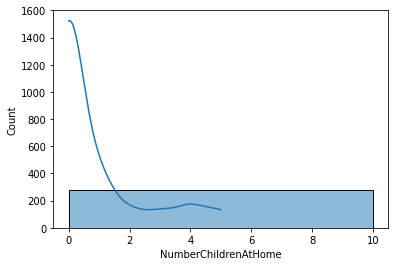

In [16]:
###Histograma para datos numéricos
grafhisto(datos, 'NumberChildrenAtHome', 10)

In [7]:
###Limpieza de datos NAN numericos
datos['NumberChildrenAtHome'] = limpiezaNum(datos, 'NumberChildrenAtHome', 'media')

In [8]:
##Crear filtros por ocupación
datos['EnglishOccupation'].value_counts()

datosPro = datos[datos['EnglishOccupation'] == 'Professional']

datosPro.head()

##Filtro mas reducido por territorio
datosPro['SalesTerritoryGroup'].value_counts()

datosPro.head()

##93 filas y 43 columnas
#datosPro.shape

##Hacer pregunta de investigación para reducir columnas
##¿Cuál es el estatus marital de las personas profesionales
#que mas realiza compras por cada territorio?
##valores de compras, género, estatur marital y territorio

datosPre = datosPro.iloc[:, [6,7,10,11,12,13,16,17,18]]

datosPre.head()

,SalesTerritoryCountry,SalesTerritoryGroup,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,BirthDate,MaritalStatus,Gender
2,United States,North America,"3399,99","1912,1544","3399,99","271,9992",1/06/1952,Single,Female
4,Australia,Pacific,"3399,99","1912,1544","3399,99","271,9992",14/08/1973,Single,Female
5,United States,North America,"3578,27","2171,2942","3578,27","286,2616",14/08/1972,Married,Male
6,Australia,Pacific,NaN,"2171,2942","3578,27","286,2616",24/07/1983,Single,Male
7,NaN,Pacific,NaN,"1912,1544","3399,99","271,9992",3/05/1969,Married,Male


### Paso 4: Limpieza de Datos y EDA

In [9]:
##Revisar datos NAN de nuevo dataframe
datosNA(datosPre)

Dimensiones : 93 filas, 9 columnas
Total de valores NAN: 4
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                 SalesTerritoryCountry     object            6          2
                   SalesTerritoryGroup     object            3          0
                             UnitPrice     object            4          2
                   ProductStandardCost     object            4          0
                           SalesAmount     object            4          0
                                TaxAmt     object            4          0
                             BirthDate     object           88          0
                         MaritalStatus     object            2          0
                                Gender     object            3          0


In [10]:
###Revisar columnas para limpieza
revCategoricos(datosPre, 'SalesTerritoryCountry')

datosPre['SalesTerritoryCountry']= modaCat(datosPre, 'SalesTerritoryCountry')

datosNA(datosPre)

Dimensiones : 93 filas, 9 columnas
Total de valores NAN: 2
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                 SalesTerritoryCountry     object            6          0
                   SalesTerritoryGroup     object            3          0
                             UnitPrice     object            4          2
                   ProductStandardCost     object            4          0
                           SalesAmount     object            4          0
                                TaxAmt     object            4          0
                             BirthDate     object           88          0
                         MaritalStatus     object            2          0
                                Gender     object            3          0


In [11]:
###Revisar unitprice
revCategoricos(datosPre, 'UnitPrice')

#datosPre['UnitPrice'] = pd.to_numeric(datosPre['UnitPrice'],errors = 'coerce')

#datosPre['UnitPrice'] = datosPre['UnitPrice'].map(lambda x: float(x))

def reemplazo(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.' + s[i+1:]
    else :
        return s 
    
datosPre['UnitPrice']=datosPre['UnitPrice'].apply(reemplazo)

datosPre.head()

datosNA(datosPre)

datosPre['UnitPrice']= datosPre['UnitPrice'].map(lambda x: float(x))

datosNA(datosPre)

Dimensiones : 93 filas, 9 columnas
Total de valores NAN: 2
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                 SalesTerritoryCountry     object            6          0
                   SalesTerritoryGroup     object            3          0
                             UnitPrice     object            4          2
                   ProductStandardCost     object            4          0
                           SalesAmount     object            4          0
                                TaxAmt     object            4          0
                             BirthDate     object           88          0
                         MaritalStatus     object            2          0
                                Gender     object            3          0
Dimensiones : 93 filas, 9 columnas
Total de valores NAN: 2
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                 SalesTerritoryCountry     object            6

Dimensiones : 93 filas, 9 columnas
Total de valores NAN: 0
                     Nombre de columna Tipo de dato   # Distintos Valores NA
                 SalesTerritoryCountry     object            6          0
                   SalesTerritoryGroup     object            3          0
                             UnitPrice    float64            4          0
                   ProductStandardCost     object            4          0
                           SalesAmount     object            4          0
                                TaxAmt     object            4          0
                             BirthDate     object           88          0
                         MaritalStatus     object            2          0
                                Gender     object            3          0


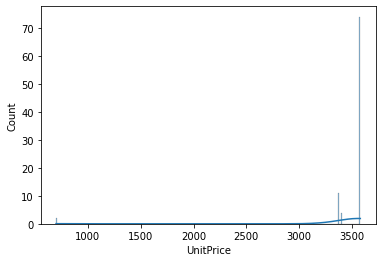

In [12]:
###Revisar histograma de UnitPrice
grafhisto(datosPre, 'UnitPrice', 10)

datosPre['UnitPrice'] = limpiezaNum(datosPre, 'UnitPrice', 'mediana')

datosNA(datosPre)

In [13]:
###Extraer año, mes y día de los cumpleaños
datosPre['HappyBirthday'] = pd.to_datetime(datosPre['BirthDate'])
##Eliminación de columna por nombre
datosPre.drop(['BirthDate'], axis=1, inplace=True)
##Revisar tipos de datos del dataframe
datosPre.info()
##Extraer año , mes y día por columna diferente.
datosPre['DayB']=datosPre['HappyBirthday'].dt.day
datosPre['MonthB']=datosPre['HappyBirthday'].dt.month
datosPre['YearB']=datosPre['HappyBirthday'].dt.year

##Se elimina columan HappyBirthday
datosPre.drop(['HappyBirthday'], axis=1, inplace=True)

datosPre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 280
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   SalesTerritoryCountry  93 non-null     object        
 1   SalesTerritoryGroup    93 non-null     object        
 2   UnitPrice              93 non-null     float64       
 3   ProductStandardCost    93 non-null     object        
 4   SalesAmount            93 non-null     object        
 5   TaxAmt                 93 non-null     object        
 6   MaritalStatus          93 non-null     object        
 7   Gender                 93 non-null     object        
 8   HappyBirthday          93 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 280
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------          

In [14]:
###Convertir a Dummies - SalesTerritoryCountry
dataDummie = convDummies(datosPre, 'SalesTerritoryCountry')

dataDummie.head()

,SalesTerritoryGroup,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,MaritalStatus,Gender,DayB,MonthB,YearB,Australia,Canada,France,Germany,United Kingdom,United States
2,North America,3399.99,"1912,1544","3399,99","271,9992",Single,Female,6,1,1952,0,0,0,0,0,1
4,Pacific,3399.99,"1912,1544","3399,99","271,9992",Single,Female,14,8,1973,1,0,0,0,0,0
5,North America,3578.27,"2171,2942","3578,27","286,2616",Married,Male,14,8,1972,0,0,0,0,0,1
6,Pacific,3578.27,"2171,2942","3578,27","286,2616",Single,Male,24,7,1983,1,0,0,0,0,0
7,Pacific,3578.27,"1912,1544","3399,99","271,9992",Married,Male,5,3,1969,0,0,0,0,0,1


In [15]:
# Convierte la coma a punto por medio de una funcion que es remplazo_multiple para que cambie varias columnas al mismo tiempo 

def reemplazo(s):
    i = str(s).find(',')
    if i > 0:
        return s[:i] + '.' + s[i+1:]
    else:
        return s

def reemplazo_multiple(df, columnas):
    for col in columnas:
        df[col] = df[col].apply(reemplazo)
    return df


In [16]:
# Llamado de la funcion remplazo_multiple y varias columnas que tenian coma las pasara la coma a punto 
dataDummie = reemplazo_multiple(dataDummie, ['ProductStandardCost', 'SalesAmount','TaxAmt','SalesAmount',])

print(dataDummie)
dataDummie.head()

    SalesTerritoryGroup  UnitPrice ProductStandardCost SalesAmount    TaxAmt  \
2         North America  3399.9900           1912.1544     3399.99  271.9992   
4               Pacific  3399.9900           1912.1544     3399.99  271.9992   
5         North America  3578.2700           2171.2942     3578.27  286.2616   
6               Pacific  3578.2700           2171.2942     3578.27  286.2616   
7               Pacific  3578.2700           1912.1544     3399.99  271.9992   
..                  ...        ...                 ...         ...       ...   
274       North America  3578.2700           2171.2942     3578.27  286.2616   
275             Pacific  3578.2700           2171.2942     3578.27  286.2616   
278       North America  3399.9900           1912.1544     3399.99  271.9992   
279       North America   699.0982            413.1463    699.0982   55.9279   
280       North America  3374.9900           1898.0944     3374.99  269.9992   

    MaritalStatus  Gender  DayB  MonthB

,SalesTerritoryGroup,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,MaritalStatus,Gender,DayB,MonthB,YearB,Australia,Canada,France,Germany,United Kingdom,United States
2,North America,3399.99,1912.1544,3399.99,271.9992,Single,Female,6,1,1952,0,0,0,0,0,1
4,Pacific,3399.99,1912.1544,3399.99,271.9992,Single,Female,14,8,1973,1,0,0,0,0,0
5,North America,3578.27,2171.2942,3578.27,286.2616,Married,Male,14,8,1972,0,0,0,0,0,1
6,Pacific,3578.27,2171.2942,3578.27,286.2616,Single,Male,24,7,1983,1,0,0,0,0,0
7,Pacific,3578.27,1912.1544,3399.99,271.9992,Married,Male,5,3,1969,0,0,0,0,0,1


In [17]:
# Table en python para saber cuantos elementos  que hay en la columna SalesTerritoryGroup
dataDummie['SalesTerritoryGroup'].value_counts()

North America 50
Pacific 22
Europe 21
Name: SalesTerritoryGroup, dtype: int64

In [18]:
# Sacar dummies a la comuna SalesTerritoryGroup en la cual genera 3 nuevas columnas en un nuevo dataframe llamado Dummiedos

dataDummiedos = convDummies(dataDummie, 'SalesTerritoryGroup')
dataDummiedos.head()

,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,MaritalStatus,Gender,DayB,MonthB,YearB,Australia,Canada,France,Germany,United Kingdom,United States,Europe,North America,Pacific
2,3399.99,1912.1544,3399.99,271.9992,Single,Female,6,1,1952,0,0,0,0,0,1,0,1,0
4,3399.99,1912.1544,3399.99,271.9992,Single,Female,14,8,1973,1,0,0,0,0,0,0,0,1
5,3578.27,2171.2942,3578.27,286.2616,Married,Male,14,8,1972,0,0,0,0,0,1,0,1,0
6,3578.27,2171.2942,3578.27,286.2616,Single,Male,24,7,1983,1,0,0,0,0,0,0,0,1
7,3578.27,1912.1544,3399.99,271.9992,Married,Male,5,3,1969,0,0,0,0,0,1,0,0,1


In [19]:
# Funcion para convertir de object a flotante 
def convertir_a_float(dataframe, columna):
    dataframe[columna] = dataframe[columna].astype(float)
    return dataframe

# Toca convertir primero de object a float para luego convertir de float a entero 

In [20]:
# Llamado de funcion de conversion a float una columna 
dataDummiedos = convertir_a_float(dataDummiedos, 'SalesAmount')
dataDummiedos = convertir_a_float(dataDummiedos, 'ProductStandardCost')
dataDummiedos = convertir_a_float(dataDummiedos, 'TaxAmt')
dataDummiedos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 280
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UnitPrice            93 non-null     float64
 1   ProductStandardCost  93 non-null     float64
 2   SalesAmount          93 non-null     float64
 3   TaxAmt               93 non-null     float64
 4   MaritalStatus        93 non-null     object 
 5   Gender               93 non-null     object 
 6   DayB                 93 non-null     int64  
 7   MonthB               93 non-null     int64  
 8   YearB                93 non-null     int64  
 9   Australia            93 non-null     uint8  
 10  Canada               93 non-null     uint8  
 11  France               93 non-null     uint8  
 12  Germany              93 non-null     uint8  
 13  United Kingdom       93 non-null     uint8  
 14  United States        93 non-null     uint8  
 15  Europe               93 non-null     uint

In [21]:
# Funccion para convertir de float a entero 
def convertir_a_enteros(dataframe, columna):
    dataframe[columna] = dataframe[columna].astype(int)
    return dataframe

In [22]:
# Llamado de funcion de conversion a int una columna
dataDummiedos = convertir_a_enteros(dataDummiedos, 'UnitPrice')
dataDummiedos = convertir_a_enteros(dataDummiedos, 'ProductStandardCost')
dataDummiedos = convertir_a_enteros(dataDummiedos, 'SalesAmount')
dataDummiedos = convertir_a_enteros(dataDummiedos, 'TaxAmt')

dataDummiedos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 2 to 280
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   UnitPrice            93 non-null     int64 
 1   ProductStandardCost  93 non-null     int64 
 2   SalesAmount          93 non-null     int64 
 3   TaxAmt               93 non-null     int64 
 4   MaritalStatus        93 non-null     object
 5   Gender               93 non-null     object
 6   DayB                 93 non-null     int64 
 7   MonthB               93 non-null     int64 
 8   YearB                93 non-null     int64 
 9   Australia            93 non-null     uint8 
 10  Canada               93 non-null     uint8 
 11  France               93 non-null     uint8 
 12  Germany              93 non-null     uint8 
 13  United Kingdom       93 non-null     uint8 
 14  United States        93 non-null     uint8 
 15  Europe               93 non-null     uint8 
 16  North Ame

In [23]:

dataDummiedos['MaritalStatus'].value_counts()
dataDummiedos['MaritalStatus'] = dataDummiedos['MaritalStatus'].map(lambda x: 1 if x == 'Married' else 0)

In [24]:
dataDummiedos['MaritalStatus'].value_counts()

1 48
0 45
Name: MaritalStatus, dtype: int64

In [25]:
# Funcion para convertir columna de texto a numeros
def convertir_columna_a_numeros(dataframe, columna, mapeo):
    dataframe[columna] = dataframe[columna].map(mapeo)
    return dataframe

In [26]:
# codigo para convertir de texto a numerico primero mapeando para que sepa el nuevo dato y luego tranforma los datos 
mapeo = {'Male': 1, 'Female': 2, 'I': 3}
dataDummiedos = convertir_columna_a_numeros(dataDummiedos, 'Gender', mapeo)

In [27]:
# ver el cambio de texto a numerico 
dataDummiedos['Gender'].value_counts()

1 47
2 45
3 1
Name: Gender, dtype: int64

In [28]:

#Correlacion con Metodo Pearson
dataDummiedos['UnitPrice'].corr(dataDummiedos['MaritalStatus'])



0.012451538464510387

In [29]:
#Correlacion con Metodo spearman
dataDummiedos['UnitPrice'].corr(dataDummiedos['MaritalStatus'], method='spearman') 

0.043487107205631106

In [30]:
#Correlacion con Metodo Kendall 
dataDummiedos['UnitPrice'].corr(dataDummiedos['MaritalStatus'], method='kendall') 

0.04249820967402666

In [31]:
#aplicar un correlacion datadummiedos mantiene nombres de la columnas
dataDummiedos.corr()

,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,MaritalStatus,Gender,DayB,MonthB,YearB,Australia,Canada,France,Germany,United Kingdom,United States,Europe,North America,Pacific
UnitPrice,1.000000,0.975004,0.999030,0.998934,0.012452,-0.001483,-0.053584,-0.111958,-0.148728,0.109777,0.004296,-0.002563,0.068597,0.024128,-0.144214,0.059722,-0.146964,0.113663
ProductStandardCost,0.975004,1.000000,0.978058,0.979504,0.010680,0.003774,-0.045789,-0.054851,-0.119394,0.144461,-0.035107,-0.049137,0.096180,0.006410,-0.135650,0.039674,-0.140336,0.125610
SalesAmount,0.999030,0.978058,1.000000,0.999975,0.008007,0.002970,-0.049568,-0.106035,-0.149760,0.112263,0.005606,-0.001357,0.070009,0.025440,-0.149068,0.062205,-0.142022,0.105422
TaxAmt,0.998934,0.979504,0.999975,1.000000,0.008103,0.002999,-0.049475,-0.104376,-0.148839,0.113435,0.004231,-0.002978,0.070947,0.024813,-0.148720,0.061486,-0.142067,0.106181
MaritalStatus,0.012452,0.010680,0.008007,0.008103,1.000000,-0.175841,0.119681,-0.090318,-0.213389,-0.249006,0.031570,-0.008476,0.220308,0.031570,0.055607,0.162684,0.051508,-0.220489
Gender,-0.001483,0.003774,0.002970,0.002999,-0.175841,1.000000,0.100208,0.173254,0.082387,0.117822,0.036168,-0.002710,-0.076766,0.036168,-0.092446,-0.030252,-0.052519,0.091379
DayB,-0.053584,-0.045789,-0.049568,-0.049475,0.119681,0.100208,1.000000,0.167307,-0.215287,-0.112862,0.027998,0.025771,0.006774,0.013119,0.056303,0.027963,0.090075,-0.133190
MonthB,-0.111958,-0.054851,-0.106035,-0.104376,-0.090318,0.173254,0.167307,1.000000,0.102157,-0.016608,0.131601,-0.197857,-0.049530,-0.092121,0.118218,-0.207598,0.215875,-0.049020
YearB,-0.148728,-0.119394,-0.149760,-0.148839,-0.213389,0.082387,-0.215287,0.102157,1.000000,0.418322,0.120266,-0.017500,-0.175924,-0.205504,-0.197867,-0.257932,-0.139313,0.417214
Australia,0.109777,0.144461,0.112263,0.113435,-0.249006,0.117822,-0.112862,-0.016608,0.418322,1.000000,-0.154079,-0.141827,-0.165683,-0.154079,-0.511766,-0.291667,-0.582364,0.970200


In [32]:
#aplicar un correlacion datadummiedos no mantiene nombres de la columnas
np.corrcoef(dataDummiedos)

array([[1. , 0.99999021, 0.99941657, ..., 0.9999947 , 0.7010328 ,
 0.999987 ],
 [0.99999021, 1. , 0.99933275, ..., 0.99999632, 0.70383836,
 0.99999891],
 [0.99941657, 0.99933275, 1. , ..., 0.99938177, 0.68718919,
 0.99932094],
 ...,
 [0.9999947 , 0.99999632, 0.99938177, ..., 1. , 0.70221064,
 0.99999612],
 [0.7010328 , 0.70383836, 0.68718919, ..., 0.70221064, 1. ,
 0.70417394],
 [0.999987 , 0.99999891, 0.99932094, ..., 0.99999612, 0.70417394,
 1. ]])

In [ ]:
# en espera a saber 
##dataDummiedos['UnitPrice'] = columna_normalizada.T

In [34]:
dataDummiedos.head()

,UnitPrice,ProductStandardCost,SalesAmount,TaxAmt,MaritalStatus,Gender,DayB,MonthB,YearB,Australia,Canada,France,Germany,United Kingdom,United States,Europe,North America,Pacific
2,3399,1912,3399,271,0,2,6,1,1952,0,0,0,0,0,1,0,1,0
4,3399,1912,3399,271,0,2,14,8,1973,1,0,0,0,0,0,0,0,1
5,3578,2171,3578,286,1,1,14,8,1972,0,0,0,0,0,1,0,1,0
6,3578,2171,3578,286,0,1,24,7,1983,1,0,0,0,0,0,0,0,1
7,3578,1912,3399,271,1,1,5,3,1969,0,0,0,0,0,1,0,0,1


In [ ]:
#leer la data o importar la data
df_from_csv = pd.read_csv('datalimpiadummiedos.csv')

# Imprimir el dataframe
print(df_from_csv)

    UnitPrice  ProductStandardCost  SalesAmount    TaxAmt  MaritalStatus  \
0   -0.202266            -0.649377    -0.197712 -0.213174      -1.027228   
1   -0.202266            -0.649377    -0.197712 -0.213174      -1.027228   
2    0.222394             0.311819     0.226973  0.230012       0.963026   
3    0.222394             0.311819     0.226973  0.230012      -1.027228   
4    0.222394            -0.649377    -0.197712 -0.213174       0.963026   
..        ...                  ...          ...       ...            ...   
88   0.222394             0.311819     0.226973  0.230012      -1.027228   
89   0.222394             0.311819     0.226973  0.230012      -1.027228   
90  -0.202266            -0.649377    -0.197712 -0.213174       0.963026   
91  -6.607754            -6.212434    -6.603564 -6.595053      -1.027228   
92  -0.261577            -0.701333    -0.257025 -0.272266       0.963026   

      Gender      DayB    MonthB     YearB  Australia    Canada    France  \
0   0.9441

In [47]:
##funcion de test de shapiro
from scipy import stats
def shapiro_test(df):
    results = []
    for column in df.columns:
        stat, p_value = stats.shapiro(df[column])
        results.append((column, stat, p_value))
    results_df = pd.DataFrame(results, columns=['Columna', 'Estadístico', 'Valor p'])
    return results_df

df= shapiro_test(dataDummiedos)
df.info
##no se puede concluir ningun tiene una distribucion normal ya que todas estan por debajo de 0.05 de la media

<bound method DataFrame.info of                 Columna  Estadístico       Valor p
0             UnitPrice     0.210706  4.700222e-20
1   ProductStandardCost     0.320013  9.231197e-19
2           SalesAmount     0.214475  5.180343e-20
3                TaxAmt     0.218018  5.678313e-20
4         MaritalStatus     0.636033  7.604238e-14
5                Gender     0.674476  4.711523e-13
6                  DayB     0.940315  3.488135e-04
7                MonthB     0.952707  2.011739e-03
8                 YearB     0.965217  1.399343e-02
9             Australia     0.516405  5.586272e-16
10               Canada     0.290081  3.947694e-19
11               France     0.264144  1.932271e-19
12              Germany     0.313989  7.763112e-19
13       United Kingdom     0.290081  3.947694e-19
14        United States     0.635359  7.374007e-14
15               Europe     0.516405  5.586272e-16
16        North America     0.634348  7.042382e-14
17              Pacific     0.526508  8.155672e-16

In [45]:

from sklearn.preprocessing import MinMaxScaler
##test de normalidad
def normaData(df):
    valores = df.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
                 index=['Min', 'Max'],
                 columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                           index=df.index,
                           columns=df.columns)
    return df_norm

data =normaData(dataDummiedos)

In [38]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return corr_mat

tidy_corr_matrix(data)

,variable_1,variable_2,r,abs_r
579,86,TaxAmt,1.0,1.0
840,127,Germany,1.0,1.0
785,121,France,1.0,1.0
789,121,Europe,1.0,1.0
345,51,TaxAmt,1.0,1.0
...,...,...,...,...
778,121,MaritalStatus,0.0,0.0
779,121,Gender,0.0,0.0
780,121,DayB,0.0,0.0
783,121,Australia,0.0,0.0


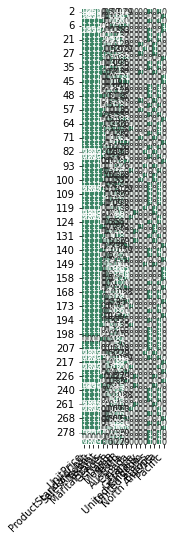

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
##figura de la grafica de correlacion
sns.heatmap(
    data,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(15, 150, n=100),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)



In [48]:
##para exportar la data limpia
dataDummiedos.to_csv('datalimpiadummiedos.csv', index=False)
df.to_csv('shapiro.csv', index=False)
data.to_csv('dataNormalidad.csv', index=False)